<a href="https://colab.research.google.com/github/DanB1421/DATA602/blob/main/Brilliant_Problem_Set_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
def confusion_matrix_heatmap(cm: np.ndarray, fsize:int=20, fmt:str=",",
                             cmap=None) -> plt.Figure:
  sns.set(font_scale=2)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(cm, annot=True, fmt=fmt, ax=ax, cmap=cmap, annot_kws={"size": fsize})
  ax.set_xlabel("Predicted Class")
  ax.set_ylabel("Actual Class")
  return fig


# Problem 1 (20 points) -- Logistic Regression
In the example given in class, using the Iris dataset, we predicted the species using only the petal length and width.  Repeat the study adding the sepal width and length (in addition to the petal width and length) as predictors.  Does classification accuracy improve with the additional predictors?

In [ ]:
from sklearn.datasets import load_iris
irisdata = load_iris()
X_train, y_train = irisdata.data, irisdata.target

In [ ]:
from sklearn.model_selection import train_test_split # imports train_test_split from sklearn
from sklearn.preprocessing import MinMaxScaler # imports MinMaxScaler from sklearn
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2) # does train_test_split of given dataset using 20% of data in test split
scaler = MinMaxScaler() # defines MinMaxScaler as scaler to be used
X_train = scaler.fit_transform(X_train) # scales X_train data with MinMaxScaler
X_test = scaler.transform(X_test) # scales X_test data with MinMaxScaler

In [ ]:
from sklearn.linear_model import LogisticRegression # imports LogisticRegression from sklearn
model = LogisticRegression(penalty='none') # creates logistic regression model with no penalty
model.fit(X_train, y_train) # fits X_train and y_train to logistic regression model

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [ ]:
model.score(X_train, y_train) # scores X_train and y_train logistic regression model

1.0

In [ ]:
model.score(X_test, y_test) # scores X_test and y_test logistic regression model

0.9333333333333333

Classification accuracy does improve with the additional predictors, as the model scores increased from 0.975 for the training data and 0.85 for the test data using only petal length and width to 1.0 for the training data and 0.9333 for the test data using petal and sepal length and width.

# Problem 2 (20 points) - Gradient Descent

As shown in class, we can obtain the weights for a logistic regression model through gradient descent.  Our objective is to find a weight matrix $\mathbf{w}$ such that $\nabla\ell(\mathbf{w})\approx0$, where $\ell(\mathbf{w})$ is the log of the likelihood function applied to the given weights and:

$$
\nabla\ell(\mathbf{w}) = \begin{bmatrix}
   \frac{\partial\ell}{\partial w_1}(\mathbf{w}) \\
 \vdots \\
 \frac{\partial\ell}{\partial w_n}(\mathbf{w})
 \end{bmatrix}=\begin{bmatrix}
   \sum_i(y^{(i)}-\phi(\mathbf{w}\cdot\mathbf{x}^{(i)}))x_1^{(i)} \\
 \vdots \\
   \sum_i(y^{(i)}-\phi(\mathbf{w}\cdot\mathbf{x}^{(i)}))x_n^{(i)} \\
 \end{bmatrix}
$$

Recall that $\phi(z)$ is the logistic function, $(1+e^{-z})^{-1}$.

In the below code, you are given values of predictors $\mathbf{X}$ and targets $\mathbf{y}\in\{0,1\}$.  The classes are linearly separable.  Using the above formula, apply gradient descent to find values $\mathbf{w}$ that separate the classes. Finally, using the code provided in the template, plot the decision boundary to visually demonstrate that the decision boundary separates the two classes.


In [ ]:
# GIVEN: X, y, phi(z)
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(50, 2, centers=[(-2,-2),(2,2)], random_state=42)
X = StandardScaler().fit_transform(X)
# add the bias term
X = np.c_[np.ones(len(X)), X]

# Initialize weights to zero
w = np.zeros(X.shape[1])

# Logistic function
phi = lambda z: 1/(1+np.exp(-z))

In [ ]:
def dl_dwj(X, y, w, j): # defines the derivative of the log of the likelihood function applied to given weights given X, y, w, and j
    sum = 0 # initializes a sum value
    for i, (xi, yi) in enumerate(zip(X, y)):
        sum += (yi - phi(np.dot(w, xi))) * xi[j] # runs the desired log likelihood function in a loop given xi, yi, w, and j and adds to initialized sum
    return sum # returns sum after the function is ran

In [ ]:
def grad(X, y, w): # defines the gradient of the log of the likelihood function applies to given weights
    ret = np.zeros(X.shape[1]) # initializes a vector in the shape of matrix X
    for j in range(X.shape[1]):
        ret[j] = dl_dwj(X, y, w, j) # runs the derivative of the log of the likelihood function for all values in the ret vector in a loop
    return ret # returns ret after the function is ran

In [ ]:
grad(X, y, w) # displays the gradient values

array([ 0.        , 23.1834813 , 22.93721468])

In [ ]:
eta = 0.1 # sets eta value for gradient descent
tau = 0.001 # sets tau value for gradient descent

while True: # begins a while loop
    grads = grad(X, y, w) # defines gradients based on the previous function
    if np.linalg.norm(grads) < tau: break # breaks the while loop if the norm of grads is below tau
    w = w - eta * -grads # defines w as the weight value minus eta multiplied by the negative gradient

w # displays w

array([-0.99818013,  9.86945964, 10.38487401])

The below code can be used to plot the prediction boundary, where `w` is the weight vector.

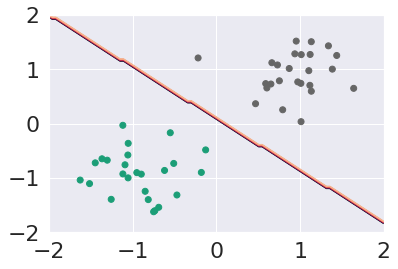

In [ ]:
gridsize = 100
gridshape = (gridsize, gridsize)
gridspace = np.linspace(-2, 2, gridsize)
x0m, x1m = np.meshgrid(gridspace, gridspace)
grid = np.c_[np.ones_like(x0m).ravel(), x0m.ravel(), x1m.ravel()]
y_pred = np.apply_along_axis(lambda x: phi(np.dot(w, x)) > 0.5, 1, grid)
plt.contour(x0m.reshape(gridshape),
            x1m.reshape(gridshape),
            y_pred.reshape(gridshape))
plt.scatter(X[:,1], X[:,2], c=y, cmap='Dark2')

#Problem 3 (60 points)

The OpenML dataset 'credit-g' classifies whether individuals are low credit risks based on 24 predictors [{Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science].

a. Load the 'credit-g' from OpenML and scale the data appropriately.  (A standard scalar will suffice for most fields, but several columns are categorical and will need to be one-hot encoded.)

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
d = fetch_openml('credit-g', as_frame=True, version=1)
df = d.data
y = (d.target == 'good').astype(int)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
df.head() # displays first 5 entries of dataframe

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [ ]:
from sklearn.preprocessing import OneHotEncoder # imports OneHotEncoder from sklearn
enc = OneHotEncoder(sparse_output=False, dtype=int, categories='auto') # modifies OneHotEncoder to create an array of integers with determined categories from the data
labels = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'] # lists the categorical columns to be one-hot encoded
X = np.array(df[labels], dtype='str') # creates an np array from the categorical columns
T = enc.fit_transform(X) # transforms X into a one-hot encoded array
onehot_labels = enc.get_feature_names_out(labels) # gets the column labels for the one-hot encoded columns
features = pd.DataFrame(T, columns=onehot_labels) # creates a dataframe from the one-hot encoded data
features.head() # displays the first 5 entries of the one-hot encoded dataframe

# strategy for one-hot encoding several columns at once found here: https://stackoverflow.com/questions/55229301/one-hot-encoding-multiple-columns-in-sklearn-and-naming-columns

,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
df_onehot = pd.concat([df, features], axis=1).drop(columns=labels) # concatenates the one-hot encoded data to the original dataframe and drops the other columns
df_onehot.head() # displays the first 5 entries of the new one-hot encoded dataframe

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler # imports standard scaler
scaler = StandardScaler() # builds a scaler from the StandardScaler module
onehot_array = np.array(df_onehot) # turns the one-hot encoded dataframe into a numpy array
X = scaler.fit_transform(onehot_array) # scales the array

b. Split the scaled data into a test and training data set.  Allocate 80\% of records to the training data set.

In [ ]:
from sklearn.model_selection import train_test_split # imports train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # splits X and y into training and test datasets, with 80% of data going to training

c. Using the training data set, build a logistic regression classifier to predict the credit risk (the target variable in the OpenML dataset).  The regression classifier should use balanced class weights.

In [ ]:
from sklearn.linear_model import LogisticRegression # imports LogisticRegression
classifier = LogisticRegression(max_iter=1000, class_weight='balanced') # creates a logistic regression classifier with balanced classification weights
classifier.fit(X_train, y_train) # fits the training data to the classifier

LogisticRegression(class_weight='balanced', max_iter=1000)

d. Generate a classification report and confusion matrix, and calculate the $F_1$ score.

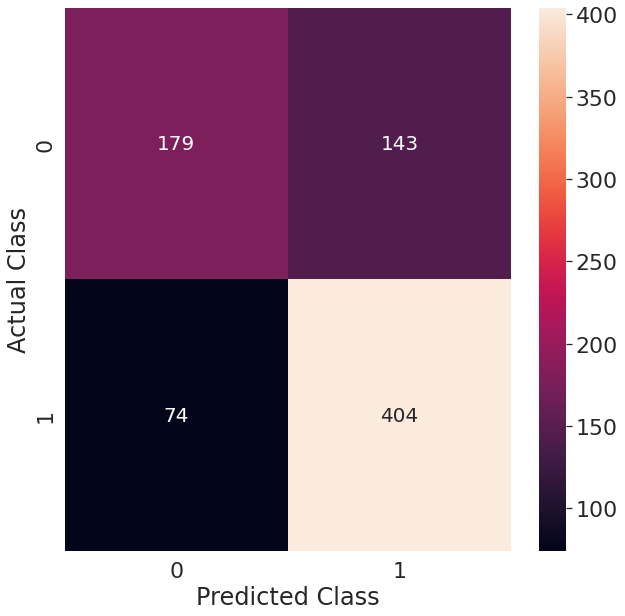

In [ ]:
from sklearn.model_selection import cross_val_predict # imports cross_val_predict
from sklearn.metrics import confusion_matrix # imports confusion_matrix

y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=10) # generates cross-validated estimates  for each data point using the developed model
cm = confusion_matrix(y_train_pred, y_train) # creates confusion matrix from the cross-validated estimates and the training data
confusion_matrix_heatmap(cm) # produces heatmap of confusion matrix
pass

In [ ]:
from sklearn.metrics import classification_report # imports classification_report
print(classification_report(y_train_pred, y_train)) # shows classification report for the model and for the training data

              precision    recall  f1-score   support

           0       0.71      0.56      0.62       322
           1       0.74      0.85      0.79       478

    accuracy                           0.73       800
   macro avg       0.72      0.70      0.71       800
weighted avg       0.73      0.73      0.72       800



e. Generate and plot the precision-recall curve.

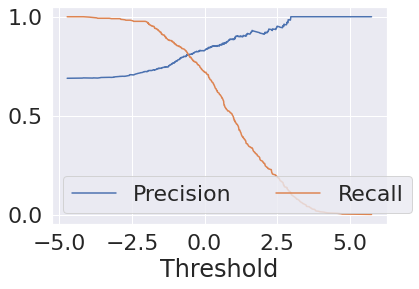

In [ ]:
from sklearn.metrics import precision_recall_curve # imports precision-recall curve function
y_scores = cross_val_predict(classifier, X_train, y_train, cv=10,
                             method="decision_function") # uses cross_val_predict to make a set of y_scores using the classifier and training data, and the decision_function method

precision, recalls, thresholds = precision_recall_curve(y_train, y_scores) # creates precision recall curve data from y_train and y_scores

fig, ax = plt.subplots() # uses matplotlib to make a plot from subplots
ax.plot(thresholds, precision[:-1], label="Precision") # creates precision curve from precision data
ax.plot(thresholds, recalls[:-1], label="Recall") # creates recall curve from recall data
ax.set_xlabel("Threshold") # labels the x axis "Threshold"
plt.legend(loc='lower left', ncol=2) # gives the plot a legend in the lower left hand corner

f. Train the model on the complete training data set, and evaluate predictive validity on the test dataset.  Do you obtain a similar $F_1$ score for the test data set.

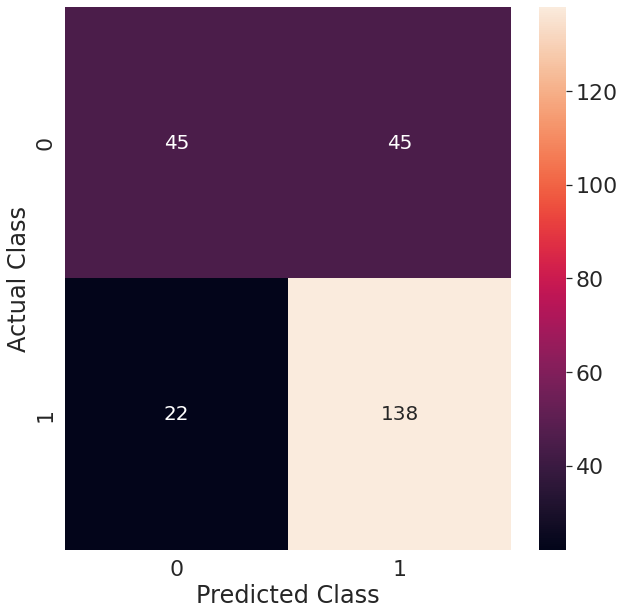

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # splits X and y into training and test datasets with all data points
classifier = LogisticRegression(max_iter=1000, class_weight='balanced') # creates a logistic regression classifier with balanced classification weights
classifier.fit(X_train, y_train) # fits the training data to the classifier
y_test_pred = cross_val_predict(classifier, X_test, y_test, cv=10) # generates cross-validated estimates  for each test data point using the developed model
cm = confusion_matrix(y_test_pred, y_test) # creates confusion matrix from the cross-validated estimates and the test data
confusion_matrix_heatmap(cm) # produces heatmap of confusion matrix
pass

In [ ]:
print(classification_report(y_test_pred, y_test)) # shows classification report for the model and for the test data

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        90
           1       0.75      0.86      0.80       160

    accuracy                           0.73       250
   macro avg       0.71      0.68      0.69       250
weighted avg       0.72      0.73      0.72       250



The F1 score for the test data set has lower predictive validity than the F1 score for the training data set.